In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import skopt.plots
import skopt

/home/isaac/.cache/pypoetry/virtualenvs/econdl-sxkRgAzp-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/isaac/.cache/pypoetry/virtualenvs/econdl-sxkRgAzp-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
results = np.load('results/19sep_monthly/experiment_records.npz', allow_pickle=True)['experiment_records']

In [14]:
train_mean_errors = []
test_mean_errors = []

for i in range(100):
    train_mean_errors.append(np.mean(results[i]['train_mean_error']))
    test_mean_errors.append(np.mean(results[i]['test_mean_error']))

    if np.mean(results[i]['test_mean_error']) < 1:
        print(results[i])

{'experiment_id': 0, 'train_mean_error': array([0.57542295, 0.70417844, 0.70786573, 0.52562134, 0.52498746,
       0.718665  , 0.75610445]), 'test_mean_error': array([0.6036559 , 1.11632286, 1.13034282, 2.08530158, 0.77623936,
       0.33031152, 0.69545303]), 'params': {'dropout_rate': 0.25, 'nodes': [200, 200, 200], 'tvpl_archi': [10], 'constant_tvpl': [50], 'precision_lambda': 0.25, 'lr': 0.001, 'activation': 'SELU', 'time_hemi_prior_variance': 1}}
{'experiment_id': 2, 'train_mean_error': array([0.55919804, 0.69195072, 0.71304284, 0.52265559, 0.52574926,
       0.71945137, 0.75313462]), 'test_mean_error': array([0.54416994, 0.96895031, 0.97229268, 1.17973015, 0.68884399,
       0.31416164, 0.65025369]), 'params': {'dropout_rate': 0.25, 'nodes': [8, 8, 8], 'tvpl_archi': [7], 'constant_tvpl': [14], 'precision_lambda': 0.25, 'lr': 0.017965626423790668, 'activation': 'SELU', 'time_hemi_prior_variance': 1}}
{'experiment_id': 4, 'train_mean_error': array([0.77502758, 0.8340255 , 0.82819394

(0.5, 1.5)

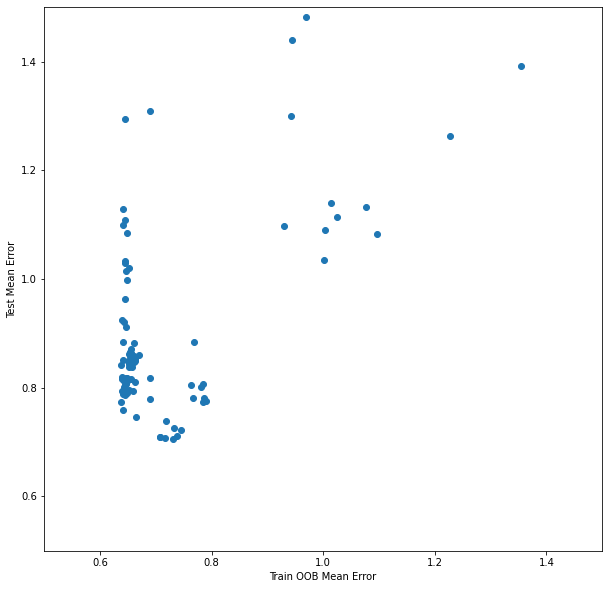

In [8]:
# Change size of dots
plt.figure(figsize=(10, 10))
plt.scatter(train_mean_errors, test_mean_errors)
# Set xlabel
plt.xlabel('Train OOB Mean Error')
# Set ylabel
plt.ylabel('Test Mean Error')
# Set the x and y limits
plt.xlim(0.5, 1.5)
plt.ylim(0.5, 1.5)

In [16]:
skopt_results.keys()

dict_keys(['x', 'fun', 'func_vals', 'x_iters', 'models', 'space', 'random_state', 'specs'])

In [2]:
skopt_results = skopt.load('results/15sep_bayesian_monthly/opt_results.pkl')

In [8]:
skopt_results.x

[0.75, 400, 2, 25, 10, 0.14185226246625862, 0.0043670016823090935, 'nn.ReLU()']

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

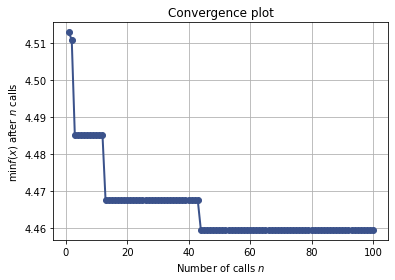

In [10]:
# Plots the best to-date result at each iteration
skopt.plots.plot_convergence(skopt_results)

array([[<AxesSubplot:xlabel='nn_width', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='nn_depth'>,
        <AxesSubplot:xlabel='nn_depth', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='tvpl'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='tvpl', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='tvpl_constant_vs_coef_ratio'>,
        <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:xlabel='tvpl_constant_vs_coef_ratio', ylabel='Number of samples'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='nn_width', ylabel='lr'>,
        <AxesSubplot:xlabel='nn_depth'>, <AxesSubplot:xlabel='tvpl'>,
        <AxesSubplot:xlabel='tvpl_constant_vs_coef_ratio'>,
        <AxesSubplot:xlabel='lr', ylabel='Number of samples'>]],
      dtype=object)

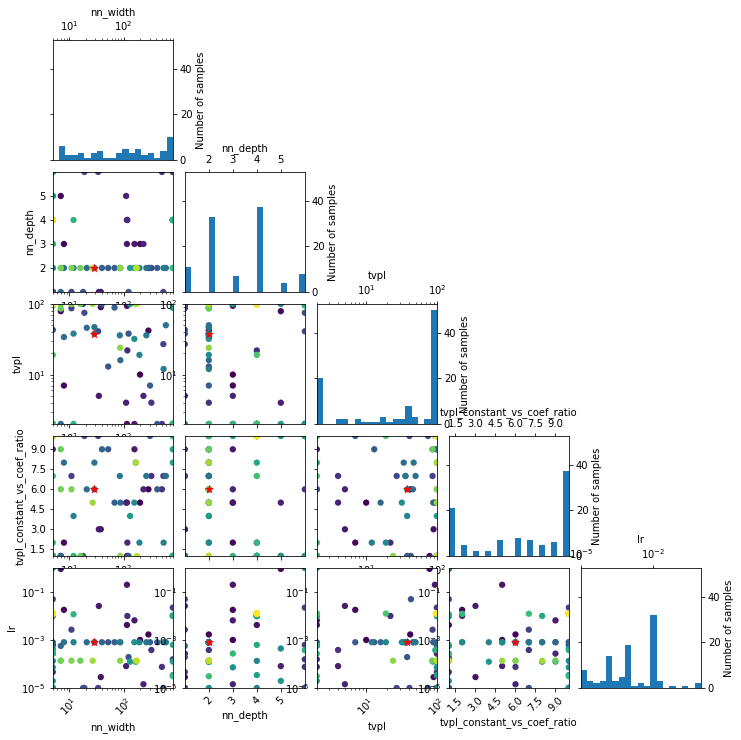

In [11]:
skopt.plots.plot_evaluations(skopt_results)

array([[<AxesSubplot:xlabel='nn_width', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='nn_depth'>,
        <AxesSubplot:xlabel='nn_depth', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='tvpl'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='tvpl', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='tvpl_constant_vs_coef_ratio'>,
        <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:xlabel='tvpl_constant_vs_coef_ratio', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='nn_width', ylabel='lr'>,
        <AxesSubplot:xlabel='nn_depth'>, <AxesSubplot:xlabel='tvpl'>,
        <AxesSubplot:xlabel='tvpl_constant_vs_coef_ratio'>,
        <AxesSubplot:xlabel='lr', ylabel='Partial dependence'>]],
      dtype=object)

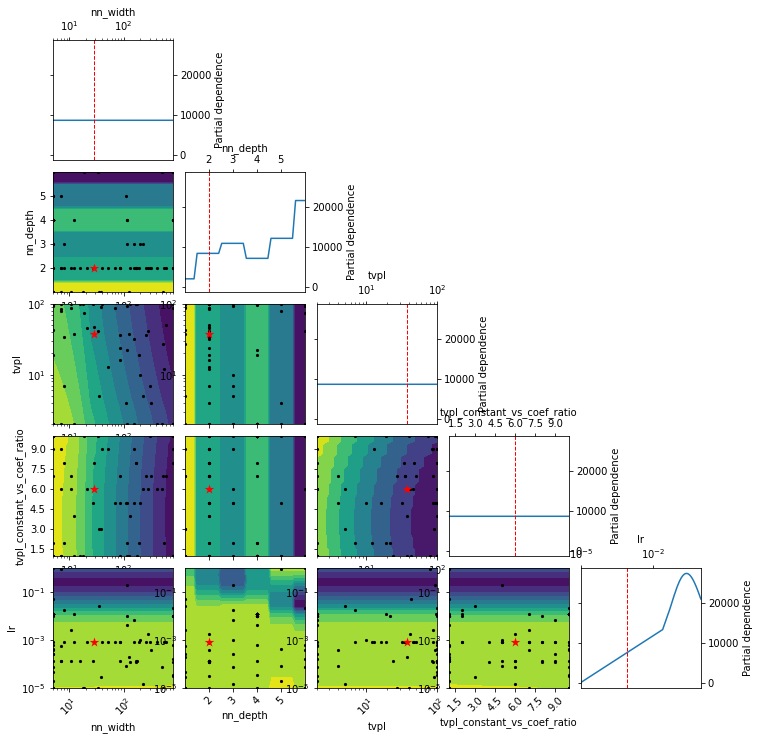

In [12]:
skopt.plots.plot_objective(skopt_results)